In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


In [52]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Load the training dataset for fraud detection from a CSV file
train = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')

In [3]:
train.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [4]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
# Check and display the number of missing values in each column of the training dataset
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [7]:
train.duplicated().sum()

0

In [8]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [24]:
# Load the testing dataset for fraud detection from a CSV file
test = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [10]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [11]:
test.count()

Unnamed: 0               555719
trans_date_trans_time    555719
cc_num                   555719
merchant                 555719
category                 555719
amt                      555719
first                    555719
last                     555719
gender                   555719
street                   555719
city                     555719
state                    555719
zip                      555719
lat                      555719
long                     555719
city_pop                 555719
job                      555719
dob                      555719
trans_num                555719
unix_time                555719
merch_lat                555719
merch_long               555719
is_fraud                 555719
dtype: int64

In [12]:
test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [39]:
df = pd.concat([train,test],axis=0)

In [40]:
df.shape

(1852394, 23)

In [41]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

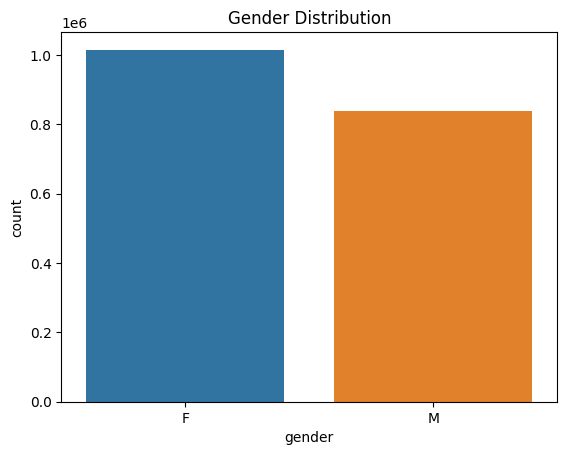

In [42]:
# Create and display a count plot for the gender distribution in the dataset
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

In [43]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [44]:
# Select and store the names of all categorical columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

In [45]:
categorical_columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [47]:
# Drop specified columns from the DataFrame to reduce dimensionality
df.drop(columns=['trans_date_trans_time','first','last','street','city','dob'],axis=1,inplace=True)

In [48]:
df.columns

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'gender',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [35]:
## we can drop all categorical columns
df.drop(columns =categorical_columns,inplace=True,axis=1)

In [49]:
df.head(10)

,Unnamed: 0,cc_num,merchant,category,amt,gender,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,F,PA,18917,40.3750,-75.2045,2158,Transport planner,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,F,KS,67851,37.9931,-100.9893,2691,Arboriculturist,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,M,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,F,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,F,TN,37040,36.5220,-87.3490,151785,Pathologist,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [50]:
# Select and store the names of categorical columns from the updated DataFrame
categorical_columns2 = df.select_dtypes(include=['object']).columns

In [51]:
# Display the names of the categorical columns in the updated DataFrame
categorical_columns2

Index(['merchant', 'category', 'gender', 'state', 'job', 'trans_num'], dtype='object')

In [54]:
# Drop the 'state' and 'job' columns from the DataFrame to simplify the dataset
df.drop(columns=['state', 'job'],axis=1, inplace=True)

In [56]:
df.columns

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [57]:
# Encode categorical columns in the DataFrame using Label Encoding for 'merchant', 'category', 'gender', and 'trans_num'
encoding = LabelEncoder()
df['merchant'] = encoding.fit_transform(df['merchant'])
df['category'] = encoding.fit_transform(df['category'])
df['gender'] = encoding.fit_transform(df['gender'])
df['trans_num'] = encoding.fit_transform(df['trans_num'])




In [58]:
df.dtypes

Unnamed: 0      int64
cc_num          int64
merchant        int64
category        int64
amt           float64
gender          int64
zip             int64
lat           float64
long          float64
city_pop        int64
trans_num       int64
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [59]:
# Calculate the correlation matrix for the numerical features in the DataFrame
corr_matrix = df.corr()

In [60]:
corr_matrix

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.000063,-0.001043,-0.000130,0.000949,-0.000233,0.000370,0.000239,-0.000610,-0.000880,-0.000647,0.174527,0.000211,-0.000611,0.000524
cc_num,0.000063,1.000000,0.000437,0.000327,0.001826,0.000333,0.041504,-0.058744,-0.048429,-0.009118,0.000953,0.000284,-0.058415,-0.048421,-0.001125
merchant,-0.001043,0.000437,1.000000,0.031020,-0.002973,-0.001247,0.000692,-0.001450,-0.000348,0.001281,-0.000329,-0.000169,-0.001362,-0.000353,-0.000424
category,-0.000130,0.000327,0.031020,1.000000,0.029665,-0.028088,0.003013,-0.008526,-0.001406,0.009318,-0.000653,0.001043,-0.008417,-0.001404,0.019278
amt,0.000949,0.001826,-0.002973,0.029665,1.000000,0.000740,0.001979,-0.000670,-0.000735,0.004921,-0.001687,-0.002411,-0.000613,-0.000711,0.209308
gender,-0.000233,0.000333,-0.001247,-0.028088,0.000740,1.000000,-0.066106,0.042862,0.050653,-0.028862,-0.000337,-0.001387,0.042621,0.050606,0.005844
zip,0.000370,0.041504,0.000692,0.003013,0.001979,-0.066106,1.000000,-0.114554,-0.909795,0.077601,-0.000728,0.001017,-0.113934,-0.908981,-0.002190
lat,0.000239,-0.058744,-0.001450,-0.008526,-0.000670,0.042862,-0.114554,1.000000,-0.014744,-0.154816,-0.001183,0.000741,0.993582,-0.014709,0.002904
long,-0.000610,-0.048429,-0.000348,-0.001406,-0.000735,0.050653,-0.909795,-0.014744,1.000000,-0.052359,0.000851,-0.000574,-0.014585,0.999118,0.001022
city_pop,-0.000880,-0.009118,0.001281,0.009318,0.004921,-0.028862,0.077601,-0.154816,-0.052359,1.000000,0.000401,-0.001636,-0.153863,-0.052329,0.000325


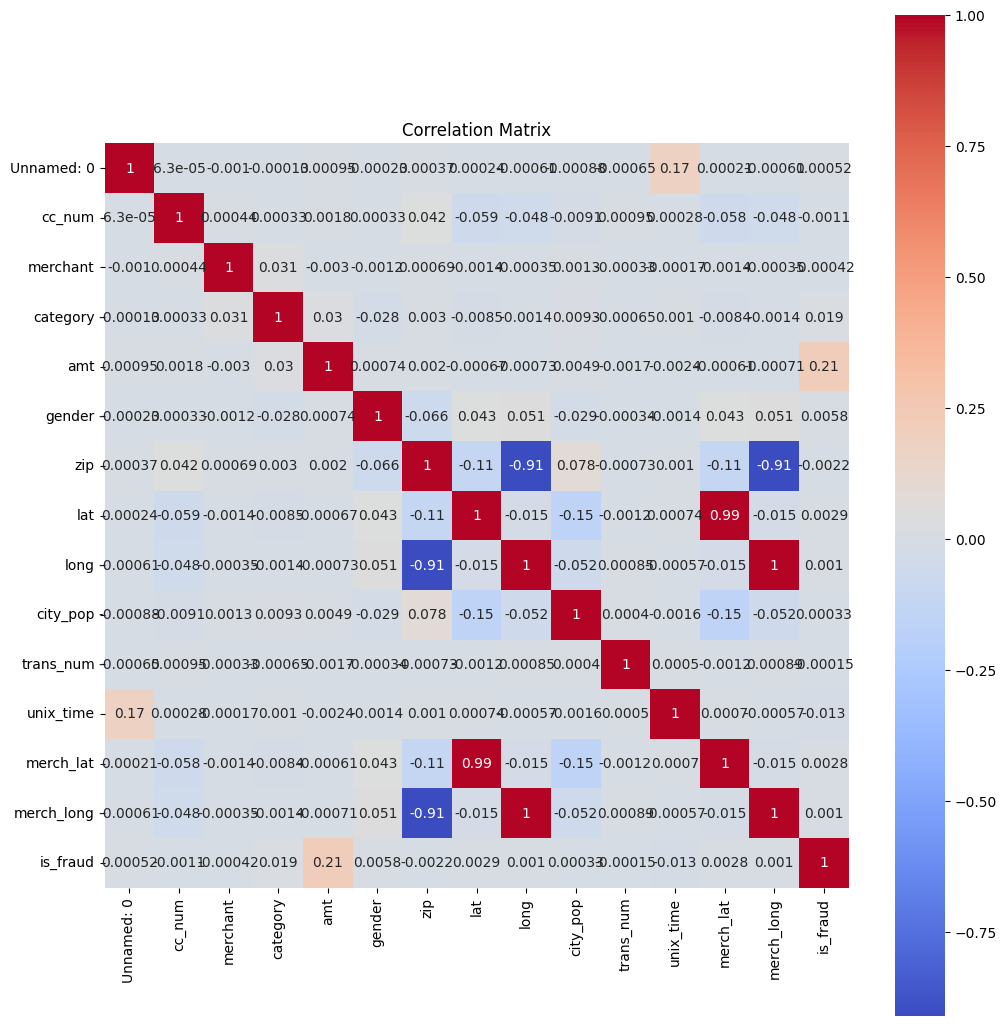

In [68]:
# Create and display a heatmap of the correlation matrix with annotations
plt.figure(figsize=(12,13))
sns.heatmap(corr_matrix,annot = True, cmap='coolwarm',square=True)
plt.title("Correlation Matrix")
plt.show()

In [69]:
df.columns

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [70]:
# Display the count of occurrences for each class in the 'is_fraud' target variable
df['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [75]:
# Identify and store columns with a correlation less than 0.5 with the target variable 'is_fraud'
important_columns = corr_matrix[corr_matrix['is_fraud']<0.5].index
important_columns 

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long'],
      dtype='object')

In [109]:
# Separate features (X) from the target variable (y) by dropping 'is_fraud' from the DataFrame
X = df.drop('is_fraud', axis =1)
y = df['is_fraud']

In [99]:
X.shape

(1852394, 14)

In [82]:
y.shape

(3685486,)

In [83]:
# Identify columns in the DataFrame that require scaling based on their value ranges outside [0, 1]
columns_need_to_scale =[]
for columns in df.columns:
    if((df[columns]<0).any() or (df[columns]>1).any()):
        columns_need_to_scale.append(columns)
        

In [84]:
print(columns_need_to_scale)

['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'trans_num', 'unix_time', 'merch_lat', 'merch_long']


In [110]:
# Split the dataset into training and testing sets with 80% for training and 20% for testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
X_train.shape

(2948388, 14)

In [111]:
# Standardize the specified columns in the training and testing sets using StandardScaler

scaler = StandardScaler()

X_train[columns_need_to_scale] = scaler.fit_transform(X_train[columns_need_to_scale])
X_test[columns_need_to_scale] = scaler.fit_transform(X_test[columns_need_to_scale])


In [112]:
# Retrieve the underlying NumPy array of the training feature set
X_train.values

array([[ 2.00866989, -0.31382262, -1.56148637, ...,  0.68323991,
         0.30344487, -1.72205365],
       [ 0.17571447, -0.3160727 ,  0.96062146, ..., -0.61526557,
        -0.6243474 , -2.11860888],
       [ 1.26158036, -0.3160674 , -0.94463948, ...,  0.11788799,
         0.36902922, -1.49595598],
       ...,
       [-1.10433814, -0.31605956,  1.67695978, ..., -1.48352504,
        -0.72393035, -1.16386017],
       [ 0.36591489, -0.31877405,  0.32885086, ..., -0.47000984,
         1.81708834, -0.52963361],
       [-1.13153339, -0.31876764, -1.65102866, ..., -1.50321761,
        -0.69648727,  0.53623191]])

In [102]:
# Initialize a Logistic Regression model
lr = LogisticRegression()

In [113]:
# Train the Logistic Regression model using the training data
lr.fit(X_train,y_train)

LogisticRegression()

In [114]:
# Make predictions on the test set using the trained Logistic Regression model
pred = lr.predict(X_test)

In [115]:
# Calculate the accuracy of the predictions made on the test set
accuracy = accuracy_score(y_test,pred)

In [117]:
# Convert accuracy to a percentage and print the result
accuracy = accuracy*100
print(f"accuracy is ",accuracy,"%")

accuracy is  99.42776783569379 %


In [119]:
dr = DecisionTreeClassifier()

In [120]:
dr.fit(X_train,y_train)

DecisionTreeClassifier()

In [121]:
pred = dr.predict(X_test)

In [122]:
accuracy = accuracy_score(y_test,pred)
accuracy = accuracy*100
print(f"accuracy is ",accuracy,"%")

accuracy is  99.53033775193735 %


In [124]:
RF = RandomForestClassifier()

In [125]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [126]:
predict = RF.predict(X_test)

In [132]:
accuracy = accuracy_score(y_test,predict)

In [133]:
accuracy = accuracy*100

In [134]:
print(f"accuracy is ",accuracy,"%")

accuracy is  99.75491188434432 %


In [41]:
Svm.fit(X_train,y_train)



SVC()

In [42]:
pred = Svm.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test,pred)
accuracy = accuracy*100
print(f"accuracy is ",accuracy,"%")

accuracy is  99.54715720239875 %
